# Import Dependencies

In [1]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib keras-flops

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import tensorflow as tf

## Setup Mediapipe Algorithm

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results): 
    # Draw face connections 
    mp_drawing.draw_landmarks( 
      image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
      mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),  
      mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))  
    # Draw pose connections 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),  
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2) 
                             )  
    # Draw left hand connections 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,  
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),  
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2) 
                             )  
    # Draw right hand connections   
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,  
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),  
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                             )  

## Video with MediaPipe

### With Frame Skip
To reduce the computational load. Frame skip methodology is introduced. Compare the above version with this version of speed.

In [7]:
video_path = 'bsl-dictionary-dataset/thanks/thanks_id1.mp4'
cap = cv2.VideoCapture(video_path)

# Set the new width and height for resizing
new_width = 680
new_height = 480

# Define the frame skip factor (process every Nth frame)
frame_skip = 9  # Adjust as needed

# Initialize a frame counter
frame_counter = 0

# Create a MediaPipe Holistic object
#Faster inference if model complexity to 0. 1 -> lower inference. 
# train in model complexity of 1 and then change to 0?
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=0) as holistic:

    while cap.isOpened():
        ret, frame = cap.read()

        # if frame is read correctly, ret is True
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
            continue

        # Increment the frame counter
        frame_counter += 1

        # Skip frames if the frame counter is not divisible by the frame_skip factor
        if frame_counter % frame_skip != 0:
            continue

        # Resize the frame
        resized_frame = cv2.resize(frame, (new_width, new_height))
        
        # Start the timer
        start_time = time.time()
        
        # Perform holistic pose detection on the resized frame
        image, results = mediapipe_detection(resized_frame, holistic)

        # Draw landmarks on the frame
        draw_styled_landmarks(image, results)

        # Display the processed frame
        cv2.imshow('frame', image)
        
        # Stop the timer, end of frame
        end_time = time.time()
        processing_time = end_time - start_time
        print(f"Frame {frame_counter}, PT: {1/processing_time:.4f}")

        # Break the loop if the 'q' key is pressed
        if cv2.waitKey(1) == ord('q'):
            break

    # Release the video capture object
    cap.release()

    # Close all OpenCV windows
    cv2.destroyAllWindows()

Frame 9, PT: 3.7163
Frame 18, PT: 14.4179
Frame 27, PT: 15.7489
Frame 36, PT: 15.2531
Can't receive frame (stream end?). Exiting ...
Frame 45, PT: 16.4538
Frame 54, PT: 16.4836
Frame 63, PT: 15.9466
Frame 72, PT: 15.5018
Frame 81, PT: 16.3361
Can't receive frame (stream end?). Exiting ...
Frame 90, PT: 16.1550
Frame 99, PT: 16.0510
Frame 108, PT: 15.7816
Frame 117, PT: 16.3121
Frame 126, PT: 16.7430
Can't receive frame (stream end?). Exiting ...
Frame 135, PT: 18.3800
Frame 144, PT: 16.9725
Frame 153, PT: 18.6241
Frame 162, PT: 18.6404
Frame 171, PT: 16.5901
Can't receive frame (stream end?). Exiting ...
Frame 180, PT: 16.6368
Frame 189, PT: 18.0795
Frame 198, PT: 19.1186
Frame 207, PT: 17.7576
Can't receive frame (stream end?). Exiting ...
Frame 216, PT: 17.9947
Frame 225, PT: 18.5146
Frame 234, PT: 18.6207
Frame 243, PT: 18.0833
Frame 252, PT: 17.8978
Can't receive frame (stream end?). Exiting ...
Frame 261, PT: 17.9293
Frame 270, PT: 18.2844
Frame 279, PT: 18.4585
Frame 288, PT: 18.

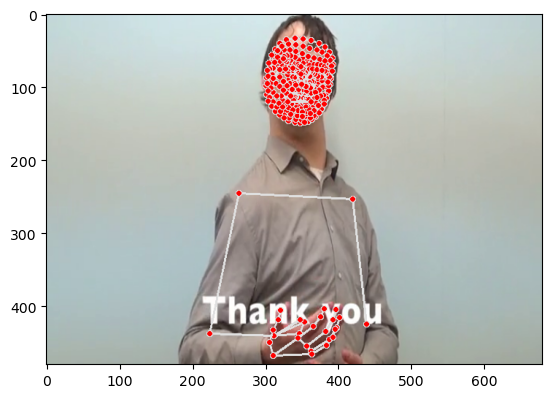

In [8]:
draw_landmarks(resized_frame, results)
# show the landmark taken
plt.imshow(cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB))

# Extracting Keypoint Values to Matrix

In [8]:
len(results.pose_landmarks.landmark) #outputs number of face landmarks. 


33

Based oon len. Clearly, there is 33 points for pose, 21 points for both hands, and 468 landmarks for face.

IF: camera didn't pick up then add in zeros to the numpy array. This ensures the array can still be fed into the machine learning even if it is not shown.

In [9]:
pose = []
##Put the landmark coordinates in the array via loop.
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test) ##put test content into pose array.

In [10]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [11]:
result_test = extract_keypoints(results)

In [12]:
result_test.shape

(1629,)

In [13]:
np.save('test_vid_matrix', result_test)

In [14]:
np.load('test_vid_matrix.npy')

array([ 0.52515578,  0.19757803, -0.76960671, ...,  0.        ,
        0.        ,  0.        ])

## Load Trained Model

In [16]:
#Load the trained model into.
#Note: ask for the kaggle parquet in order to make predictions easier. Load dataset from there
#'lstm-models/models_sweep/models/AK-GRU32-LR-Dense256-gelu-fs=15-cls=3.tf'
#'lstm-models/models-cloud/AK-LSTM128-DENSE128-DENSE256'
# AK-GRU64-LR-Dense256-gelu-cls=5
model_path = 'lstm-models/models-cloud/AK-LSTM128-DENSE128-DENSE256'
# Load the model
loaded_model = tf.keras.models.load_model(model_path)



In [ ]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,  # Enable TensorFlow Lite ops.
                                      tf.lite.OpsSet.SELECT_TF_OPS]  # Enable select TensorFlow ops.

tflite_model = converter.convert()

# Specify the path to save the TensorFlow Lite model
tflite_model_path = 'lstm-models/models-lite/model.tflite'

# Save the converted model to the specified path
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

In [45]:
model_path = "lstm-models/models (1)/models/AK-GRU512-LR-Dense256-gelu-cls=3.tf"
# Load the model
loaded_model = tf.keras.models.load_model(model_path)
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,  # Enable TensorFlow Lite ops.
                                      tf.lite.OpsSet.SELECT_TF_OPS]  # Enable select TensorFlow ops.

tflite_model = converter.convert()

# Specify the path to save the TensorFlow Lite model
tflite_model_path = 'lstm-models/models-lite/RK-LSTM32-LR-Dense256-fs=36-cls=5.tflite'

# Save the converted model to the specified path
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\mered\AppData\Local\Temp\tmp_ara31sw\assets


INFO:tensorflow:Assets written to: C:\Users\mered\AppData\Local\Temp\tmp_ara31sw\assets


In [46]:
#compare size of TFlite model and normal model
import os
model_normal_path = "lstm-models/models (1)/models/RK-LSTM32-LR-Dense256-fs=36-cls=5.tf"
model_lite_path = 'lstm-models/models-lite/RK-LSTM32-LR-Dense256-fs=36-cls=5.tflite'

def get_directory_size(path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)
    return total_size

# Get the file size of each model
original_model_size = get_directory_size(model_normal_path)
tflite_model_size = os.path.getsize(model_lite_path)

# Convert size from bytes to megabytes
original_model_size_mb = original_model_size / (1024 * 1024)
tflite_model_size_mb = tflite_model_size / (1024 * 1024)

# Calculate percentage reduction
percentage_reduction = ((original_model_size_mb - tflite_model_size_mb) / original_model_size_mb) * 100


# Print out the sizes
print(f"Original Model Size: {original_model_size_mb:.2f} MB")
print(f"TFLite Model Size: {tflite_model_size_mb:.2f} MB")
print(f"Percentage Reduction: {percentage_reduction:.2f}%")

Original Model Size: 1.43 MB
TFLite Model Size: 0.26 MB
Percentage Reduction: 82.04%


In [10]:
#load model only and generate summary
model_path = "lstm-models/models (1)/models/AK-GRU512-LR-Dense256-gelu-cls=3.tf"
# Load the model
loaded_model = tf.keras.models.load_model(model_path)

loaded_model.summary()




Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 512)               3291648   
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               131328    
                                                                 
 dense_21 (Dense)            (None, 3)                 771       
                                                                 
Total params: 3423747 (13.06 MB)
Trainable params: 3423747 (13.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Live Implementation

In [17]:
colors = [(245,117,16), (117,245,16), (16,117,245), (20,117,245), (300,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [18]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8
new_width = 680
new_height = 480
#3: actions = np.array(['listen', 'look', 'shhh'])
#actions = np.array(['donkey','listen', 'look', 'mouse', 'shhh'])
actions = np.array(['listen', 'look', 'shhh'])
trained_frame = 60

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        resized_frame = cv2.resize(frame, (new_width, new_height))

        # Make detections
        image, results = mediapipe_detection(resized_frame, holistic) 
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-trained_frame:]
        
        if len(sequence) == trained_frame:
            res = loaded_model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('Sign Recognition Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

### Edge Method code with Prediction
1. All-Keypoints Mediapipe Holistic Processing

In [17]:
import cv2
import sys, time
import mediapipe as mp
import numpy as np
import tensorflow as tf

In [19]:

# Initialize MediaPipe solutions
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh
mp_hands = mp.solutions.hands
mp_pose = mp.solutions.pose

# Setup MediaPipe instances
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5)
pose = mp_pose.Pose(static_image_mode=False, model_complexity=1, smooth_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5, min_tracking_confidence=0.5)

def get_face_pose_hands_mesh(image):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image through the MediaPipe models
    face_results = face_mesh.process(rgb_image)
    pose_results = pose.process(rgb_image)
    hand_results = hands.process(rgb_image)

    annotated_image = image.copy()
    drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

    # Draw detected landmarks on the image for the face
    if face_results.multi_face_landmarks:
        for face_landmarks in face_results.multi_face_landmarks:
            mp_drawing.draw_landmarks(
                image=annotated_image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_CONTOURS,
                landmark_drawing_spec=drawing_spec,
                connection_drawing_spec=drawing_spec
            )

    # Draw pose landmarks
    if pose_results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=pose_results.pose_landmarks,
            connections=mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2)
        )

    # Draw hand landmarks and classify left or right
    if hand_results.multi_hand_landmarks:
        for hand_landmarks, handedness in zip(hand_results.multi_hand_landmarks, hand_results.multi_handedness):
            color = (245, 117, 66) if handedness.classification[0].label == 'Right' else (121, 44, 250)
            mp_drawing.draw_landmarks(
                image=annotated_image,
                landmark_list=hand_landmarks,
                connections=mp_hands.HAND_CONNECTIONS,
                landmark_drawing_spec=mp_drawing.DrawingSpec(color=color, thickness=2, circle_radius=2),
                connection_drawing_spec=mp_drawing.DrawingSpec(color=color, thickness=2)
            )

    keypoints = extract_keypoints(face_results, pose_results, hand_results)
    return annotated_image, keypoints

def extract_keypoints(face_results, pose_results, hand_results):
    # Flatten the coordinates of the detected landmarks from each results object
    pose = np.array([[res.x, res.y, res.z] for res in pose_results.pose_landmarks.landmark]).flatten() if pose_results.pose_landmarks else np.zeros(33*3)
    
    # Correctly extract face landmarks
    if face_results.multi_face_landmarks:
        face = np.array([[lm.x, lm.y, lm.z] for face_landmarks in face_results.multi_face_landmarks for lm in face_landmarks.landmark]).flatten()
    else:
        face = np.zeros(468*3)
    
    # Initialize arrays for left and right hands
    lh = np.zeros(21*3)
    rh = np.zeros(21*3)
    
    if hand_results.multi_hand_landmarks:
        for hand_landmarks, handedness in zip(hand_results.multi_hand_landmarks, hand_results.multi_handedness):
            if handedness.classification[0].label == 'Left':
                lh = np.array([[res.x, res.y, res.z] for res in hand_landmarks.landmark]).flatten()
            elif handedness.classification[0].label == 'Right':
                rh = np.array([[res.x, res.y, res.z] for res in hand_landmarks.landmark]).flatten()

    return np.concatenate([pose, face, lh, rh])

#Visualize Probability on imshow!
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame
#Load TFLite model
model_path = 'lstm-models/models-cloud/AK-LSTM128-DENSE128-DENSE256'
# Load the model
loaded_model = tf.keras.models.load_model(model_path)

In [ ]:
#Compare TFLite vs without lite
model_normal_path = 'lstm-models/models-cloud/AK-LSTM128-DENSE128-DENSE256'
# Load the model
loaded_normal_model = tf.keras.models.load_model(model_normal_path)
loaded_normal_model.summary()

In [29]:
#Load TFLite model
model_path = 'lstm-models/models-lite/AK-LSTM128-DENSE128-DENSE256.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

OSError: Unable to open file (file signature not found)

In [35]:
#compare size of TFlite model and normal model
import os
model_normal_path = 'lstm-models/models-cloud/AK-LSTM128-DENSE128-DENSE256'
model_lite_path = 'lstm-models/models-lite/AK-LSTM128-DENSE128-DENSE256.tflite'

def get_directory_size(path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)
    return total_size

# Get the file size of each model
original_model_size = get_directory_size(model_normal_path)
tflite_model_size = os.path.getsize(model_lite_path)

# Convert size from bytes to megabytes
original_model_size_mb = original_model_size / (1024 * 1024)
tflite_model_size_mb = tflite_model_size / (1024 * 1024)

# Print out the sizes
print(f"Original Model Size: {original_model_size_mb:.2f} MB")
print(f"TFLite Model Size: {tflite_model_size_mb:.2f} MB")

Original Model Size: 11.59 MB
TFLite Model Size: 3.64 MB


In [24]:
#main application code
sequence = []
sentence = []
threshold = 0.7
new_width = 680
new_height = 480
actions = ['listen', 'look', 'shhh']
trained_frame = 60

#for FPS print
fps_text_x = new_width - 10  # 10 pixels from the right edge
fps_text_y = new_height - 10  # 10 pixels from the bottom edge

font = cv2.FONT_HERSHEY_SIMPLEX    
cap = cv2.VideoCapture(0)
if (cap.isOpened() == False): 
  print("Unable to read camera feed")    
  
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
while cap.isOpened():
  s = time.time()
  ret, img = cap.read()  
  resized_frame = cv2.resize(frame, (new_width, new_height))
  if ret == False:
      print('WebCAM Read Error')    
      sys.exit(0)
  #Make detections
  image, keypoints = get_face_pose_hands_mesh(img)
  sequence.append(keypoints)
  sequence = sequence[-trained_frame:]
  
  if len(sequence) == trained_frame:
      res = loaded_model.predict(np.expand_dims(sequence, axis=0))[0]
      print(actions[np.argmax(res)])
      
      
  #3. Viz logic
      if res[np.argmax(res)] > threshold: 
          if len(sentence) > 0: 
              if actions[np.argmax(res)] != sentence[-1]:
                  sentence.append(actions[np.argmax(res)])
          else:
              sentence.append(actions[np.argmax(res)])

      if len(sentence) > 5: 
          sentence = sentence[-5:]

      # Viz probabilities
      image = prob_viz(res, actions, image, colors)
      
  cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
  cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

  e = time.time()
  fps = 1 / (e - s)
  print('FPS:%5.2f'%(fps))
  #cv2.putText(image, 'FPS:%5.2f'%(fps), (fps_text_x,fps_text_y), font, fontScale = 1,  color = (0,255,0), thickness = 1)
  cv2.imshow('webcam feed', img)
  cv2.imshow('Sign Recognition Feed', image)
  if cv2.waitKey(10) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()


FPS: 1.41
FPS:11.21
FPS:11.37
FPS:11.22
FPS:11.11
FPS:11.11
FPS:10.95
FPS:11.29
FPS:11.60
FPS:11.85
FPS:11.79
FPS:11.09
FPS:11.48
FPS:11.99
FPS:12.19
FPS:11.19
FPS:13.33
FPS:13.43
FPS:11.35
FPS:11.62
FPS:11.68
FPS: 2.32
FPS: 9.14
FPS: 8.84
FPS: 9.12
FPS: 9.12
FPS:12.10
FPS:11.31
FPS:11.05
FPS:11.29
FPS:11.46
FPS:11.47
FPS:11.38
FPS:11.08
FPS:11.77
FPS:11.66
FPS:11.61
FPS:11.36
FPS:11.42
FPS:11.48
FPS:12.07
FPS:11.27
FPS:10.88
FPS: 9.47
FPS: 7.42
FPS: 7.23
FPS: 9.29
FPS: 9.00
FPS: 7.19
FPS:11.78
FPS: 7.54
FPS:11.99
FPS: 8.46
FPS: 9.99
FPS:10.11
FPS: 9.57
FPS: 9.80
FPS:10.01
FPS:10.03
1/1 [==============================] - 0s 25ms/step
look
FPS: 5.59
1/1 [==============================] - 0s 21ms/step
look
FPS: 5.80
1/1 [==============================] - 0s 25ms/step
look
FPS: 5.66
1/1 [==============================] - 0s 23ms/step
look
FPS: 5.89
1/1 [==============================] - 0s 23ms/step
look
FPS: 6.02
1/1 [==============================] - 0s 27ms/step
look
FPS: 5.55
1/1 [===

In [22]:
np.array(sequence).shape

(60, 1629)

In [30]:
mhi_ps_path = "lstm-models/models (2)/models/EfficientNetB0_tau=5_delta=0.tf"
#"lstm-models/models (2)/models/EfficientNetB0_tau=26_delta=1.tf"
#EfficientNetB0_tau=5_delta=0.tf
loaded_model = tf.keras.models.load_model(mhi_ps_path)


In [36]:
# Prepare the input data (dummy data matching the model's input shape)
input_shape = (1, 224, 224, 3)  # Batch size of 1
random_input = np.random.rand(*input_shape).astype('float32')

# Initialize a list to store inference times
inference_times = []

# Run predictions 40 times
for _ in range(40):
    start_time = time.time()
    predictions = loaded_model.predict(random_input)
    end_time = time.time()

    # Calculate and store the inference time for this prediction
    inference_time = end_time - start_time
    inference_times.append(inference_time)

# Calculate average, minimum, and maximum inference times
average_time = np.mean(inference_times)
min_time = np.min(inference_times)
max_time = np.max(inference_times)

print(f"Average Inference Time: {average_time:.6f} seconds")
print(f"Minimum Inference Time: {min_time:.6f} seconds")
print(f"Maximum Inference Time: {max_time:.6f} seconds")

1/1 [==============================] - 0s 55ms/step
Average Inference Time: 0.126886 seconds
Minimum Inference Time: 0.111358 seconds
Maximum Inference Time: 0.178110 seconds


In [47]:
model_path = "lstm-models/models-cloud/AK-LSTM128-DENSE128-DENSE256"
loaded_model = tf.keras.models.load_model(model_path)

In [38]:
inference_times = []  # List to collect each inference time

# Run predictions 40 times
for i in range(40):
    # Prepare dummy input data that matches the input shape of the model for each iteration
    input_shape = (1, 60, 1629)  # Batch size of 1
    random_input = np.random.rand(*input_shape).astype('float32')

    # Measure the inference time
    start_time = time.time()
    predictions = loaded_model.predict(random_input)
    end_time = time.time()

    # Calculate and store the inference time for this prediction
    inference_time = end_time - start_time
    inference_times.append(inference_time)  # Add this inference time to the list

# Calculate and print average inference time
average_inference_time = np.mean(inference_times)
print(f"Average Inference Time: {average_inference_time:.6f} seconds")

1/1 [==============================] - 0s 25ms/step
Average Inference Time: 0.096583 seconds


In [48]:
model_path = "lstm-models/models-cloud/AK-LSTM128-DENSE128-DENSE256"
loaded_model = tf.keras.models.load_model(model_path)

flops = tf.keras.utils.get_flops(loaded_model)
print(f"FLOPs: {flops}")

AttributeError: module 'keras.api._v2.keras.utils' has no attribute 'get_flops'

SyntaxError: invalid syntax (1577513462.py, line 1)

In [3]:
from keras_flops import get_flops
model_path = "lstm-models/models-cloud/AK-LSTM128-DENSE128-DENSE256"
loaded_model = tf.keras.models.load_model(model_path)

# Calculae FLOPS
flops = get_flops(loaded_model, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")

KeyError: "Registering two statistical functions with name 'AddV2,flops'! (Previous registration was in register c:\\Users\\mered\\anaconda3\\envs\\BSL_Project\\Lib\\site-packages\\tensorflow\\python\\framework\\registry.py:65)"

In [27]:
np.array(sequence).shape

(60, 1629)

In [ ]:
np.array()